# Detecting rooftop available surface for installing PV modules in aerial images using Machine Learning

In [8]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot  as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from model.unet import *
from loss.loss import *
%load_ext autoreload
%autoreload 2
from process_data.data_loader import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Loading the Data Set
First we load the data set that we will use for training. Each sample is an image with its mask (label). An image is represented as a 3x250x250 array with each of the 3 color chanel being 250x250 pixels. The asssociated mask is a 250x250 array, 

In [10]:
folder_path_image = 'data\image'
folder_path_mask  = 'data\mask'

train_dataset = DataLoaderSegmentation(folder_path_image,folder_path_mask)
train_loader = DataLoader(train_dataset,batch_size=2, shuffle=True,num_workers=2)

In [11]:
for i, (im_batch, mask_batch) in enumerate(train_loader):
    #plt.imshow(mask[i])
    #print(mask[i].shape)
    print(mask_batch.shape)
    #plt.show()
    #plt.imshow(np.transpose(im[i],(1,2,0)))
    #plt.show()

torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([2, 388, 388])
torch.Size([1, 388, 388])


# Augment the data set
We can build a more diverse and robust training set by applying transformations to the manually labeled images

# Initiate the model
In this report, we will use the Unet model presented in medical image segmentation, and in the previous papers of the Professor.

In [12]:
model = UNet().to(device)
print(model)

UNet(
  (conv1_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_block): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_block): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (max3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_block): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=

# Loss & Optimizer

In [32]:
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training Loop

In [27]:
num_epochs = 10

for epoch in range(num_epochs):
    print(epoch)
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
    print(loss)


0
tensor(0.1132, device='cuda:0', grad_fn=<MseLossBackward>)
1
tensor(0.2362, device='cuda:0', grad_fn=<MseLossBackward>)
2
tensor(0.1304, device='cuda:0', grad_fn=<MseLossBackward>)
3
tensor(0.1166, device='cuda:0', grad_fn=<MseLossBackward>)
4
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward>)
5
tensor(0.0841, device='cuda:0', grad_fn=<MseLossBackward>)
6
tensor(0.0799, device='cuda:0', grad_fn=<MseLossBackward>)
7
tensor(0.2109, device='cuda:0', grad_fn=<MseLossBackward>)
8
tensor(0.1365, device='cuda:0', grad_fn=<MseLossBackward>)
9
tensor(0.0796, device='cuda:0', grad_fn=<MseLossBackward>)


In [28]:
labels.shape

torch.Size([1, 388, 388])

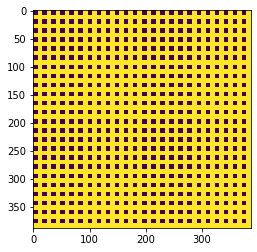

In [29]:
y = outputs[0][0].cpu().detach().numpy()
mean = np.mean(y)
y[y > mean] = 1
y[y < mean] = 0
plt.imshow(y)

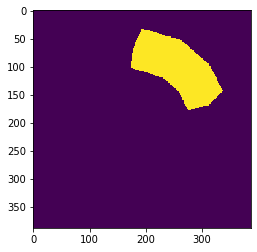

In [30]:
x = labels.cpu().detach().numpy()[0]
plt.imshow(x)

In [31]:
recall(x,y)

0.08173911503170724